# Bias Variance Analysis 
* In this notebook 
1. We will practice to compute bias and variance in polynomial regression
2. Understand the trade off relation between bias and variance


In [1]:
# Loading Packages
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Polynomial regression
* We will use polynomial regresion model which is an extended version of linear regression
* It predicts output variable y using nth degree polynoimal in x.

#### Example (degree=2)

In [2]:
# Making polynomial regression model
X_ex = np.arange(5) 
Y_ex =  3 - 2 * X_ex + X_ex ** 2 - X_ex ** 3

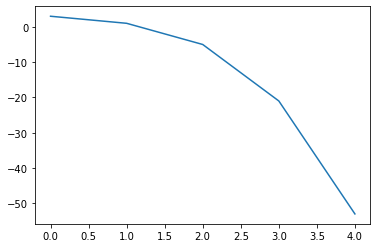

In [3]:
plt.plot(X_ex,Y_ex)

* We will try to predict above graph using degree 2 polynomial regression

In [4]:
poly = PolynomialFeatures(degree=2)
X_ex_trans = poly.fit_transform(X_ex[:, np.newaxis])

print("Input")
print(X_ex)
print("Output of Polynomial Features")
print(X_ex_trans)
for row in range(X_ex_trans.shape[0]):
    print("constant : {}, x1 : {}, x1**2 : {}".format(X_ex_trans[row,0],X_ex_trans[row,1], X_ex_trans[row,2] ))

Input
[0 1 2 3 4]
Output of Polynomial Features
[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]
constant : 1.0, x1 : 0.0, x1**2 : 0.0
constant : 1.0, x1 : 1.0, x1**2 : 1.0
constant : 1.0, x1 : 2.0, x1**2 : 4.0
constant : 1.0, x1 : 3.0, x1**2 : 9.0
constant : 1.0, x1 : 4.0, x1**2 : 16.0


In [5]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(X_ex[:, np.newaxis], Y_ex)
coefs = model.named_steps['linear'].coef_
print("Final Equation : y = {:.2f} + {:.2f}*x1 + {:.2f}*(x1**2)".format(
    coefs[0],coefs[1],coefs[2]
))
print("Original Equation y =  3 - 2 * x1 + (x1 ** 2) - (x1**3)")

Final Equation : y = 1.80 + 6.60*x1 + -5.00*(x1**2)
Original Equation y =  3 - 2 * x1 + (x1 ** 2) - (x1**3)


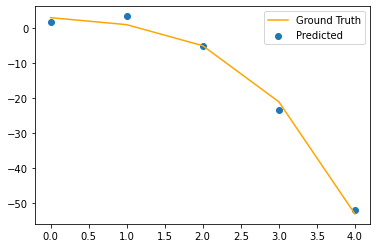

In [6]:
Y_ex_pred = model.predict(X_ex[:, np.newaxis])
plt.scatter(X_ex,Y_ex_pred,label='Predicted')
plt.plot(X_ex,Y_ex,label='Ground Truth',color='orange')
plt.legend()

## Predicting Sine Graph with Polynomial Regression
* We will try to fit a polynomial model to approximate the Sine graph
* Lets first generate some data
* First of all we need to make input data x and output data y

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

In [8]:
np.random.seed(10)
random.seed(10)

def get_y_true(x):
    y = np.sin(x)
    return y

def get_y_noise(x):
    y = get_y_true(x) + np.random.uniform(-0.4, 0.4, len(x))
    return y

def get_sample(sample_ratio, x, y):
    m = len(x)
    m_new = int(np.round(sample_ratio*m))
    ind = random.sample(range(m), m_new)
    ind = np.sort(ind)
    x_sample = x[ind]
    y_sample = y[ind]
    y_true_sample = get_y_true(x_sample)
    return x_sample, y_sample, y_true_sample

### Generate Sine Graph Data


Text(0.5, 1.0, 'True Distribution')

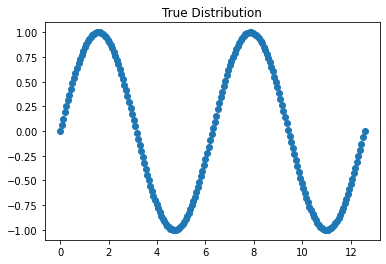

In [9]:
random.seed(10)
x_num = 200
x_space = np.linspace(0,np.pi*4,x_num) # dvide the space 0 to 10 in 100 pieces!
y = get_y_true(x_space) # sine function
plt.scatter(x_space,y) # Draw scatter plot
plt.title("True Distribution")


Split Train, Test Dataset

In [10]:
np.random.seed(10)
rand_indicies = list(range(0,x_num))
random.shuffle(rand_indicies)
rand_idicies_train, rand_idicies_test =rand_indicies[:int(x_num*0.8)], rand_indicies[int(x_num*0.8):]
x_train = x_space[rand_idicies_train]
y_train = get_y_noise(x_train)

x_test = x_space[rand_idicies_test]
y_test = get_y_noise(x_test)

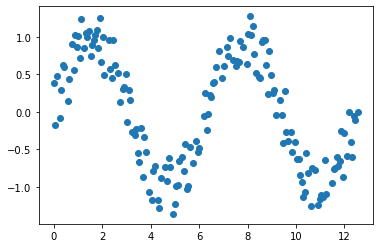

In [11]:
plt.scatter(x_train,y_train) # Train data

Text(0.5, 1.0, 'Test Data')

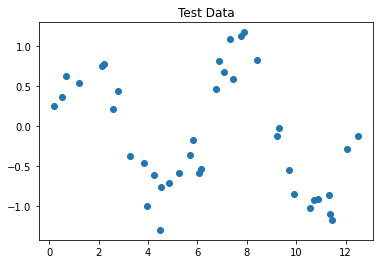

In [12]:
plt.scatter(x_test,y_test)
plt.title("Test Data")

### Polynomial Regression with degree 1

In [13]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(x_train[:, np.newaxis], y_train)
y_predict = model.predict(x_train[:,np.newaxis])

Text(0.5, 1.0, 'Ground Truth VS Predicted')

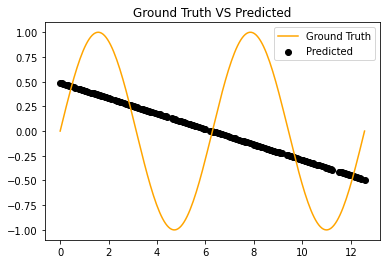

In [14]:
plt.scatter(x_train,y_predict, label='Predicted', color ='black')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

In [15]:
# Dictionary for containing the results
result_dict = defaultdict(dict)

#### Checking Mean Square Error

In [16]:
y_test_predict = model.predict(x_test[:,np.newaxis])
## check Train, Test mse
mse_train = mean_squared_error(y_train,y_predict)
mse_test = mean_squared_error(y_test,y_test_predict)
result_dict[1]['mse_train'] = mse_train
result_dict[1]['mse_test'] = mse_test
print("mse Train : {}, Test : {}".format(mse_train,mse_test))

mse Train : 0.456555897331168, Test : 0.4686182390294486


#### Checking Bias and Variance

1. Sample from Train Data
2. Train the model using the sample
3. Predict the value of train data using the trained model 
4. iterate 1~3 and average the value's of 3 (exp_f_x)
5. Compute Bias and Variance

In [17]:
random.seed(10)
num_sampling = 1000
degree = 1

model_list = []
exp_f_x = np.zeros(len(x_train))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.3,x=x_train,y=y_train)
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                  ('linear', LinearRegression(fit_intercept=False))])
    model.fit(x_train_sample[:, np.newaxis], y_train_sample)
    exp_f_x += model.predict(x_train[:, np.newaxis])
    model_list.append(model)


exp_f_x/=num_sampling
bias = (np.linalg.norm(exp_f_x-y_train))
print("Exp_f_X",np.mean(exp_f_x))
print("y True",np.mean(y_train))

var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + np.square(model.predict(x_train[:, np.newaxis])-exp_f_x)
var = var/num_sampling
variance = np.linalg.norm(var)

result_dict[1]['bias'] = bias
result_dict[1]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

Exp_f_X 0.007891424824144495
y True 0.001729309867700285
degree : 1 bias : 8.547223087599878 variance : 0.14839642346308748


### Practice : Make Polynoimal Regression model with degree 5
1. Compute the Train , Test MeanSquare Error
2. Compute Bias and Variance

Text(0.5, 1.0, 'Ground Truth VS Predicted')

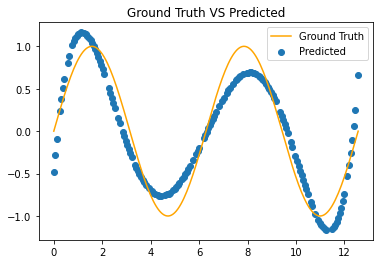

In [18]:
model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train[:, np.newaxis], y_train)

y_predict = model.predict(x_train[:,np.newaxis])

plt.scatter(x_train,y_predict, label='Predicted')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

In [19]:
y_test_predict = model.predict(x_test[:,np.newaxis])
## check Train, Test mse
mse_train = mean_squared_error(y_train,y_predict)
mse_test = mean_squared_error(y_test,y_test_predict)
result_dict[5]['mse_train'] = mse_train
result_dict[5]['mse_test'] = mse_test
print("mse Train : {}, Test : {}".format(mse_train,mse_test))

mse Train : 0.09843459452995688, Test : 0.10757329836338694


#### Compute Bias and Variance

In [20]:
random.seed(10)
num_sampling = 1000
degree = 5

model_list = []
exp_f_x = np.zeros(len(x_train))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.3,x=x_train,y=y_train)
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                  ('linear', LinearRegression(fit_intercept=False))])
    model.fit(x_train_sample[:, np.newaxis], y_train_sample)
    exp_f_x += model.predict(x_train[:, np.newaxis])
    model_list.append(model)


exp_f_x/=num_sampling
bias = np.linalg.norm(exp_f_x-y_train)
var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + np.square(model.predict(x_train[:, np.newaxis])-exp_f_x)
var = var/num_sampling
variance = np.linalg.norm(var)
result_dict[5]['bias'] = bias
result_dict[5]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

degree : 5 bias : 4.001578134237983 variance : 0.582050846518665


Text(0.5, 1.0, 'Bias & Variance of degree 1, 5')

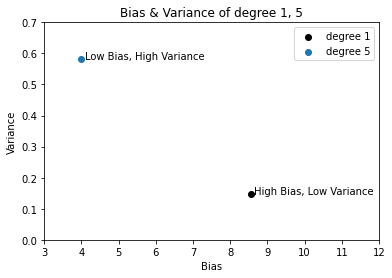

In [21]:
plt.scatter(result_dict[1]['bias'],result_dict[1]['var'], label='degree 1', color='black')
plt.text(result_dict[1]['bias'] + 0.1,result_dict[1]['var'], "High Bias, Low Variance")
plt.scatter(result_dict[5]['bias'],result_dict[5]['var'], label='degree 5')
plt.text(result_dict[5]['bias'] + 0.1 ,result_dict[5]['var'], "Low Bias, High Variance")

plt.legend()
plt.xlim(3,12)
plt.ylim(0,0.7)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.title("Bias & Variance of degree 1, 5")

#### Compute Bias & Variance for different degrees


In [22]:
degree_list = [1,2,3,5,10,12]
for d in degree_list:
    model_list = []
    mse_train = 0
    mse_test = 0
    exp_f_x = np.zeros(len(x_train))
    for i in range(num_sampling):
        x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.40,x=x_train,y=y_train)
        model = Pipeline([('poly', PolynomialFeatures(degree=d)),
                      ('linear', LinearRegression(fit_intercept=False))])
        model.fit(x_train_sample[:, np.newaxis], y_train_sample)
        
        
        # For mse
        y_train_sample_predict = model.predict(x_train_sample[:, np.newaxis])
        y_test_predict = model.predict(x_test[:,np.newaxis])
        mse_train += mean_squared_error(y_train_sample,y_train_sample_predict)
        mse_test += mean_squared_error(y_test,y_test_predict)
        
        exp_f_x += model.predict(x_train[:, np.newaxis])
        model_list.append(model)

    mse_train /= num_sampling
    mse_test /= num_sampling
    exp_f_x/=num_sampling

    # Bias
    bias = (np.linalg.norm(exp_f_x-y_train))
    
    # Variance
    var = 0
    for j in range(num_sampling):
        model = model_list.pop(0)
        var = var + np.square(model.predict(x_train[:, np.newaxis])-exp_f_x)
    var = var/num_sampling
    variance = np.linalg.norm(var)
    print("degree : {} bias : {} variance : {}".format(d, bias,variance) )

    result_dict[d] = {'bias':bias,'var':variance,'mse_train':mse_train,'mse_test':mse_test}

degree : 1 bias : 8.547073989291494 variance : 0.09886979326669196
degree : 2 bias : 8.540696855129692 variance : 0.13982086215643785
degree : 3 bias : 7.9902737310709515 variance : 0.345135999105741
degree : 5 bias : 3.977012966330095 variance : 0.32913580527751973
degree : 10 bias : 2.7485480117770105 variance : 0.8719989998648224
degree : 12 bias : 2.7252782123816477 variance : 3.377483744411572


Text(0.5, 1.0, 'Bias & Variance ')

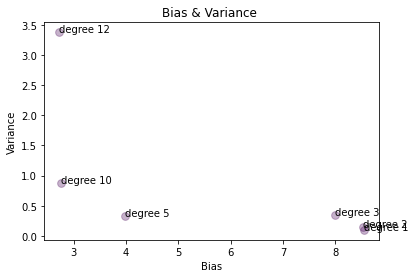

In [23]:
for d in degree_list:
    plt.scatter(result_dict[d]['bias'],result_dict[d]['var'],s=60, label='degree {}'.format(d), 
                 c=d ,alpha=0.3)
    plt.text(result_dict[d]['bias'],result_dict[d]['var'],'degree {}'.format(d))


plt.xlabel("Bias")
plt.ylabel("Variance")
plt.title("Bias & Variance ")

In [24]:
bias_list = []
variance_list = []
train_mse_list = []
test_mse_list = []
for d in degree_list:
    bias_list.append(result_dict[d]['bias'])
    variance_list.append(result_dict[d]['var'])
    train_mse_list.append(result_dict[d]['mse_train'])
    test_mse_list.append(result_dict[d]['mse_test'])

Text(0.5, 1.0, 'Bias and Variance Trade off')

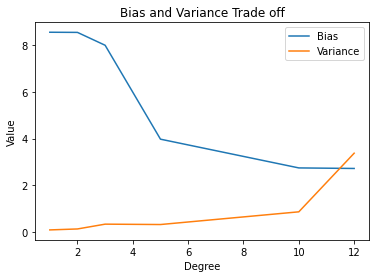

In [25]:
plt.plot(degree_list,bias_list, label='Bias')
plt.plot(degree_list,variance_list, label='Variance')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Value")
plt.title("Bias and Variance Trade off")

Text(0.5, 1.0, 'Train and Test mse')

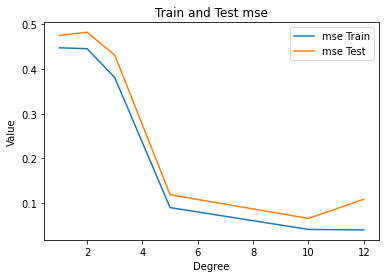

In [26]:
plt.plot(degree_list,train_mse_list, label= 'mse Train')
plt.plot(degree_list,test_mse_list, label='mse Test')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Value")
plt.title("Train and Test mse")

### More Degree == Better Results?
* more sensitive too noise !

Text(0.5, 1.0, 'Train Data with noise')

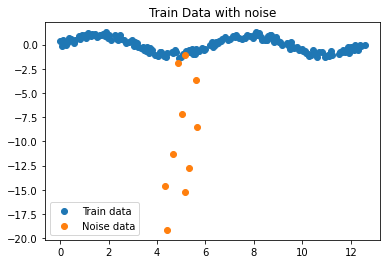

In [27]:
random.seed(10)
x_noise = [random.uniform(4,6) for i in range(10)]
y_noise = [random.uniform(-20,-1) for i in range(10)]
plt.scatter(x_train,y_train, label='Train data')
plt.scatter(x_noise,y_noise, label='Noise data')
plt.legend()
plt.title("Train Data with noise")

In [28]:
x_train_noise = np.append(x_train,x_noise)
y_train_noise = np.append(y_train,y_noise)

### Case 1 : Degree 5

mse Train : 0.9640609236912981 Test : 0.9707441973507234


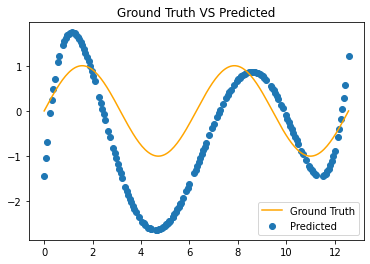

In [29]:
model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train_noise[:, np.newaxis], y_train_noise)

y_predict = model.predict(x_train_noise[:,np.newaxis])

plt.scatter(x_train_noise,y_predict, label='Predicted')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

y_true = np.sin(x_train_noise)
y_test_predict = model.predict(x_test[:,np.newaxis])
y_test_true = np.sin(x_test)

## check Train, Test mse
mse_train = mean_squared_error(y_true,y_predict)
mse_test = mean_squared_error(y_test_true,y_test_predict)

print("mse Train : {} Test : {}".format(mse_train,mse_test))
    
# # Variance, Bias
# mse = np.mean((y_predict - y_true) ** 2)
# var = np.var(y_predict)
# bias = abs(mse - var)
# print("Variance : {} \nBias : {}".format(var,bias))

In [30]:
random.seed(10)
num_sampling = 1000
degree = 5

model_list = []
exp_f_x = np.zeros(len(x_train_noise))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.3,x=x_train_noise,y=y_train_noise)
    model.fit(x_train_sample[:, np.newaxis], y_train_sample)
    exp_f_x += model.predict(x_train_noise[:, np.newaxis])
    model_list.append(model)


exp_f_x/=num_sampling
bias = np.linalg.norm(exp_f_x-y_train_noise)
var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + np.square(model.predict(x_train_noise[:, np.newaxis])-exp_f_x)
var = var/num_sampling
variance = np.linalg.norm(var)
result_dict[5]['bias'] = bias
result_dict[5]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

degree : 5 bias : 31.32933115564707 variance : 11.101795868478233


### Case 2 : Degree 10

mse Train : 1.2496113009169065 Test : 1.2307568794076236


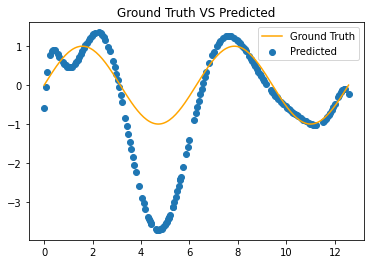

In [31]:
model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train_noise[:, np.newaxis], y_train_noise)

y_predict = model.predict(x_train_noise[:,np.newaxis])

plt.scatter(x_train_noise,y_predict, label='Predicted')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

y_true = np.sin(x_train_noise)
y_test_predict = model.predict(x_test[:,np.newaxis])
y_test_true = np.sin(x_test)

## check Train, Test mse
mse_train = mean_squared_error(y_true,y_predict)
mse_test = mean_squared_error(y_test_true,y_test_predict)

print("mse Train : {} Test : {}".format(mse_train,mse_test))
    
# # Variance, Bias
# mse = np.mean((y_predict - y_true) ** 2)
# var = np.var(y_predict)
# bias = (mse - var)
# print("Variance : {} \nBias : {}".format(var,bias))

* More degree of model, gives more flexibility in decision boundarys.
* More prone to overfit

In [32]:
random.seed(10)
num_sampling = 1000
degree = 10

model_list = []
exp_f_x = np.zeros(len(x_train_noise))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.3,x=x_train_noise,y=y_train_noise)
    model.fit(x_train_sample[:, np.newaxis], y_train_sample)
    exp_f_x += model.predict(x_train_noise[:, np.newaxis])
    model_list.append(model)


exp_f_x/=num_sampling
bias = np.linalg.norm(exp_f_x-y_train_noise)
var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + np.square(model.predict(x_train_noise[:, np.newaxis])-exp_f_x)
var = var/num_sampling
variance = np.linalg.norm(var)
result_dict[5]['bias'] = bias
result_dict[5]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

degree : 10 bias : 30.20053331490037 variance : 27.092010199683592
